In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, layers
from tensorflow.keras.optimizers import SGD

In [2]:
datagen = ImageDataGenerator()
train_path = os.path.join('chest_xray', 'train')
test_path = os.path.join('chest_xray', 'test')
val_path = os.path.join('chest_xray', 'val')

train_gen = datagen.flow_from_directory(train_path)
test_gen = datagen.flow_from_directory(test_path)
val_gen = datagen.flow_from_directory(val_path)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


1e-06

In [44]:
opt = SGD(learning_rate=1*10**-5)

`model.fit_generator(train_gen, validation_data=val_gen)`

In [19]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [72]:
def baseline_model(image_shape):
    model_layers = [
        layers.Input(image_shape),
        layers.Flatten(),
        layers.Dense(24, activation='relu'),
        layers.Dense(2, activation='sigmoid')
    ]
    model = Sequential(model_layers)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [73]:

baseline_model = baseline_model(train_gen.image_shape)
results_1 = baseline_model.fit(train_gen, validation_data=val_gen, epochs=25)

Epoch 1/25
163/163 [==============================] - 78s 477ms/step - loss: 7.6501 - accuracy: 0.7393 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/25
163/163 [==============================] - 75s 461ms/step - loss: 0.6931 - accuracy: 0.7431 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/25
163/163 [==============================] - 76s 464ms/step - loss: 0.6930 - accuracy: 0.7431 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/25
163/163 [==============================] - 76s 463ms/step - loss: 0.6930 - accuracy: 0.7431 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/25
163/163 [==============================] - 76s 467ms/step - loss: 0.6929 - accuracy: 0.7431 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/25
163/163 [==============================] - 75s 459ms/step - loss: 0.6929 - accuracy: 0.7431 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/25
163/163 [==============================] - 75s 459ms/step - loss: 0.6928 - accuracy: 0.7431 - val_loss: 0.6931 - val_ac

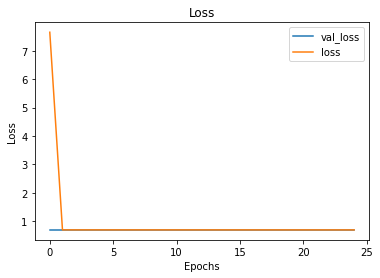

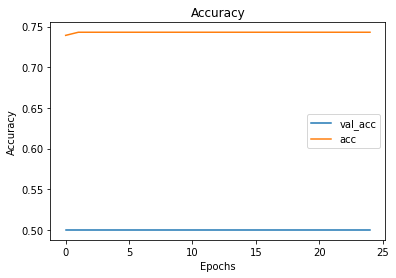

In [94]:
visualize_training_results(results_1)

In [74]:
def conv_1(image_shape):
    these_layers = [
        layers.Input(image_shape),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(2, activation='sigmoid')
    ]
    model = Sequential(these_layers)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [75]:
model_2 = conv_1(train_gen.image_shape)
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 516128)            0         
_________________________________________________________________
dense_45 (Dense)             (None, 32)                16516128  
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 66        
Total params: 16,517,090
Trainable params: 16,517,090
Non-trainable params: 0
_________________________________________________________________


In [76]:
results_2 = model_2.fit(train_gen, validation_data=val_gen, epochs=25)

Epoch 1/25
163/163 [==============================] - 144s 860ms/step - loss: 331.8945 - accuracy: 0.6756 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 2/25
163/163 [==============================] - 131s 802ms/step - loss: 0.6568 - accuracy: 0.7429 - val_loss: 0.6997 - val_accuracy: 0.5000
Epoch 3/25
163/163 [==============================] - 132s 809ms/step - loss: 0.6333 - accuracy: 0.7429 - val_loss: 0.7084 - val_accuracy: 0.5000
Epoch 4/25
163/163 [==============================] - 130s 797ms/step - loss: 0.6152 - accuracy: 0.7429 - val_loss: 0.7194 - val_accuracy: 0.5000
Epoch 5/25
163/163 [==============================] - 131s 802ms/step - loss: 0.6016 - accuracy: 0.7429 - val_loss: 0.7315 - val_accuracy: 0.5000
Epoch 6/25
163/163 [==============================] - 130s 796ms/step - loss: 0.5917 - accuracy: 0.7429 - val_loss: 0.7440 - val_accuracy: 0.5000
Epoch 7/25
163/163 [==============================] - 131s 797ms/step - loss: 0.5845 - accuracy: 0.7429 - val_loss: 0.7568

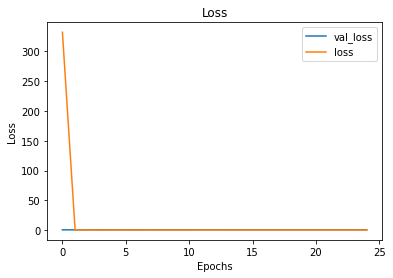

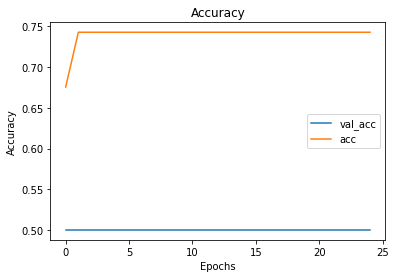

In [95]:
visualize_training_results(results_2)

In [91]:
def AlexNet(image_shape):
    model_layers = [
        layers.Input(image_shape),
        layers.Conv2D(24, (11,11), activation = 'relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3,3)),
        layers.Conv2D(64, (5,5), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3,3)),
        layers.Conv2D(96, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(96, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((3,3)),
        layers.Flatten(),
        layers.Dense(192, activation='relu'),
        layers.Dropout(.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(.3),
        layers.Dense(2, activation='sigmoid')
    ]
    
    model = Sequential(model_layers)
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [92]:
model_3 = AlexNet(train_gen.image_shape)
model_3.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 246, 246, 24)      8736      
_________________________________________________________________
batch_normalization_65 (Batc (None, 246, 246, 24)      96        
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 82, 82, 24)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 82, 82, 64)        38464     
_________________________________________________________________
batch_normalization_66 (Batc (None, 82, 82, 64)        256       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 27, 27, 96)      

In [96]:
results_3 = model_3.fit(train_gen, validation_data=val_gen, epochs=25)

Epoch 1/25
  4/163 [..............................] - ETA: 14:29 - loss: 0.5884 - accuracy: 0.7891

KeyboardInterrupt: 

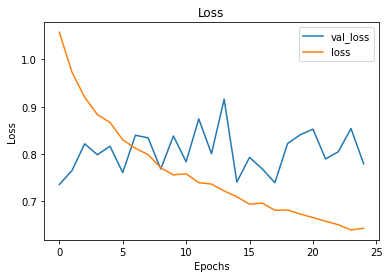

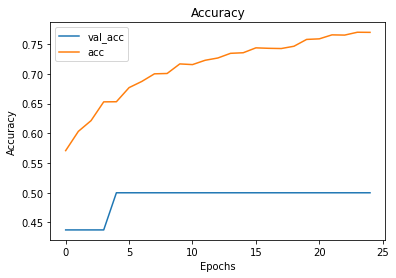

In [97]:
visualize_training_results(results_3)

In [63]:
from tensorflow.keras import Model

def SimpleResNet(image_shape):
    input_layer = layers.Input(image_shape)
    
    X = layers.Conv2D(16, (3,3), activation='relu')(input_layer)
    X = layers.BatchNormalization()(X)
    
    X_shortcut = X
    
    X = layers.Conv2D(16, (3,3), padding='same', activation='relu')(X)
    X = layers.BatchNormalization()(X)
    
    X = layers.Add()([X, X_shortcut]) #Skip Connection
    X = layers.Activation('relu')(X)
    X = layers.Flatten()(X)
    X = layers.Dense(2, activation='sigmoid')(X)
    
    model = Model(inputs=input_layer, outputs=X, name='ResNet')
    
    model.compile(loss='binary_crossentropy',
                 optimizer=opt,
                  metrics=['accuracy'])
    
    return model

In [64]:
model_4 = SimpleResNet(train_gen.image_shape)
model_4.summary()

Model: "ResNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 254, 254, 16) 448         input_16[0][0]                   
__________________________________________________________________________________________________
batch_normalization_38 (BatchNo (None, 254, 254, 16) 64          conv2d_39[0][0]                  
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 254, 254, 16) 2320        batch_normalization_38[0][0]     
_____________________________________________________________________________________________

In [65]:
results_4 = model_4.fit(train_gen, validation_data=val_gen, epochs=25)

Epoch 1/25
163/163 [==============================] - 274s 2s/step - loss: 0.5047 - accuracy: 0.8163 - val_loss: 0.8084 - val_accuracy: 0.5625
Epoch 2/25
163/163 [==============================] - 274s 2s/step - loss: 0.2893 - accuracy: 0.9099 - val_loss: 0.6622 - val_accuracy: 0.5625
Epoch 3/25
163/163 [==============================] - 275s 2s/step - loss: 0.2209 - accuracy: 0.9342 - val_loss: 0.6640 - val_accuracy: 0.6875
Epoch 4/25
163/163 [==============================] - 278s 2s/step - loss: 0.1794 - accuracy: 0.9488 - val_loss: 0.6296 - val_accuracy: 0.6875
Epoch 5/25
163/163 [==============================] - 271s 2s/step - loss: 0.1528 - accuracy: 0.9584 - val_loss: 0.5825 - val_accuracy: 0.6875
Epoch 6/25
163/163 [==============================] - 272s 2s/step - loss: 0.1344 - accuracy: 0.9659 - val_loss: 0.5673 - val_accuracy: 0.6875
Epoch 7/25
163/163 [==============================] - 272s 2s/step - loss: 0.1187 - accuracy: 0.9714 - val_loss: 0.5462 - val_accuracy: 0.6875

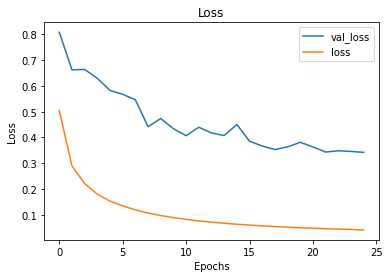

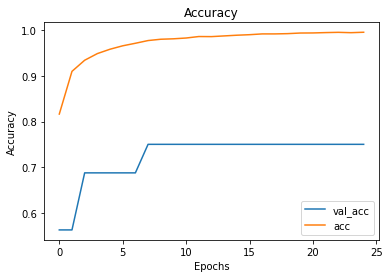

In [98]:
visualize_training_results(results_4)